In [ ]:
#gerekli kütüphanelerin tanımlanması
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,precision_recall_curve, auc, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
%matplotlib inline

In [ ]:
#veri setini okuma
m_data = pd.read_csv("mushrooms.csv")
#veri setini gösterme
m_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
#veri seti hakkında bilgiler
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
m_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
m_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
#veri seti içerisindeki satır ve sütun sayılarını öğrenme
print("Mushrooms veri seti", m_data.shape)

Mushrooms veri seti (8124, 23)


In [ ]:
m_data["class"].unique

<bound method Series.unique of 0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object>

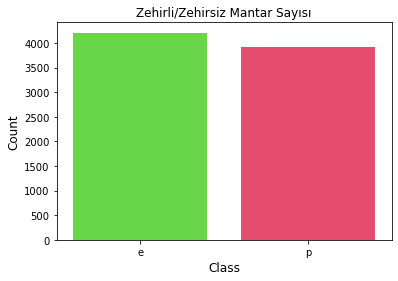

In [ ]:
#p ve e'nin sayısal değerlerini grafikte gösterme
number = m_data["class"].value_counts()
sns.barplot(number.index, number.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Zehirli/Zehirsiz Mantar Sayısı')
plt.show()

In [ ]:
#veri setindeki değerlerin sayısal olarak ifade edilmesi
labelencoder=LabelEncoder()
for column in m_data.columns:
    m_data[column] = labelencoder.fit_transform(m_data[column])
    
m_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
#veri setinin feature ve label olarak ayrılması 
X = m_data.drop(["class"], axis = 1)
y = m_data["class"]

# KNN Classification

## test_size = 0.1 

In [ ]:
#veri setini train ve test olarak ayırma 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.1)

Text(0, 0.5, 'Accuracy')

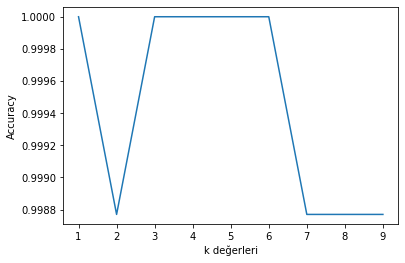

In [ ]:
#k değerine 1-10 arasında değer verilirse
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

#çıkan sonuçları grafikte gösterme
plt.plot(k_range, scores)
plt.xlabel('k değerleri')
plt.ylabel('Accuracy')

In [ ]:
#k=9 olarak belirlenirse
knn_val = KNeighborsClassifier(n_neighbors=9)
knn_val.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

0.998769987699877


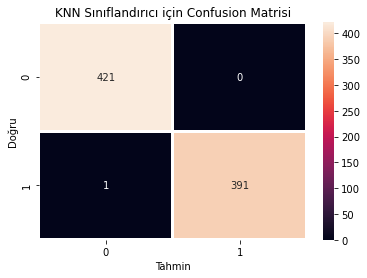

In [ ]:
y_pred_knn = knn_val.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_knn))

c_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(c_matrix, annot = True, fmt = "g", lw=2)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('KNN Sınıflandırıcı için Confusion Matrisi')
plt.show()

## test_size = 0.4

In [ ]:
model = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.4)

Text(0, 0.5, 'Accuracy')

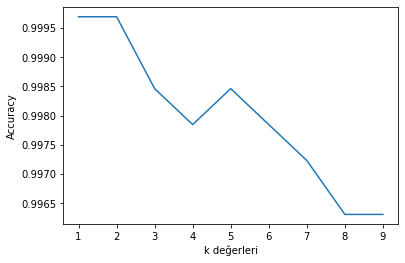

In [ ]:
#k değerine 1-10 arasında değer verilirse
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

#çıkan sonuçları grafikte gösterme
plt.plot(k_range, scores)
plt.xlabel('k değerleri')
plt.ylabel('Accuracy')

In [ ]:
#k=2 olarak belirlenirse
knn_val = KNeighborsClassifier(n_neighbors=10)
knn_val.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

0.9950769230769231


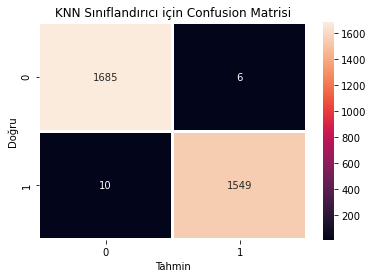

In [ ]:
y_pred_knn = knn_val.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_knn))
c_matrix = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(c_matrix, annot = True, fmt = "g", lw=2)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('KNN Sınıflandırıcı için Confusion Matrisi')
plt.show()

## test_size = 0.6

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.6)

Text(0, 0.5, 'Accuracy')

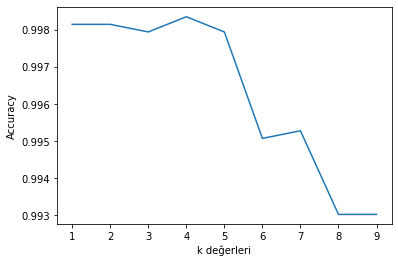

In [ ]:
#k değerine 1-10 arasında değer verilirse
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

#çıkan sonuçları grafikte gösterme
plt.plot(k_range, scores)
plt.xlabel('k değerleri')
plt.ylabel('Accuracy')

KNN classifier report: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2514
           1       0.99      0.99      0.99      2361

    accuracy                           0.99      4875
   macro avg       0.99      0.99      0.99      4875
weighted avg       0.99      0.99      0.99      4875



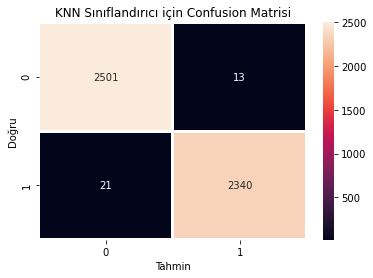

In [ ]:
y_pred_knn = knn.predict(X_test)
print("KNN classifier report: \n\n", classification_report(y_test, y_pred_knn))

c_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(c_matrix, annot = True, fmt = "g", lw=2)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('KNN Sınıflandırıcı için Confusion Matrisi')
plt.show()


# Naive Bayes Classification

## test_size = 0.1

In [ ]:
#veri setini train ve test olarak ayırma 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_test, y_test)*100)

92.8659286592866


KNN classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93       421
           1       0.92      0.93      0.93       392

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813



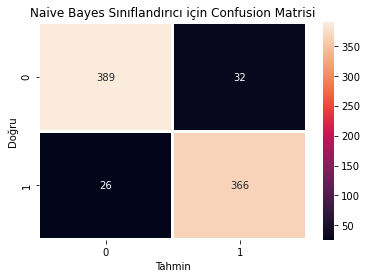

In [ ]:
y_pred_naiveb = nb.predict(X_test)
print("KNN classifier report: \n\n", classification_report(y_test, y_pred_naiveb))

c_matrix = confusion_matrix(y_test, y_pred_naiveb)
sns.heatmap(c_matrix, annot = True, fmt = "g", lw=2)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('Naive Bayes Sınıflandırıcı için Confusion Matrisi')
plt.show()


## test_size = 0.4

In [ ]:
model = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.4)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_test, y_test)*100)

92.95384615384616


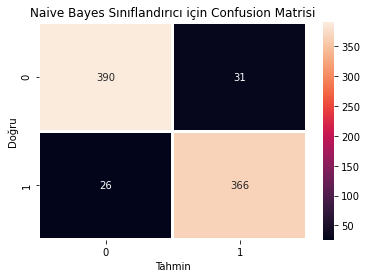

In [ ]:
y_pred_naiveb = nb.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred_naiveb)
sns.heatmap(c_matrix, annot = True, fmt = "g", lw=2)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('Naive Bayes Sınıflandırıcı için Confusion Matrisi')
plt.show()

## test_size =0.6

In [ ]:
#veri setini train ve test olarak ayırma 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.6)

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_test, y_test)*100)

92.43076923076923


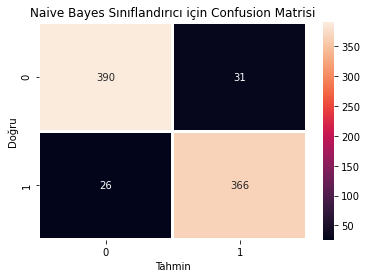

In [ ]:
y_pred_naiveb = nb.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred_naiveb)
sns.heatmap(c_matrix, annot = True, fmt = "g", lw=2)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('Naive Bayes Sınıflandırıcı için Confusion Matrisi')
plt.show()

# Lojistik Regresyon Sınıflandırıcısı

## test_size = 0.1

In [ ]:
#veri setini train ve test olarak ayırma 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.1)

In [ ]:
lr = LogisticRegression(solver = "lbfgs", max_iter = 500)
lr.fit(X_train, y_train)
print(lr.score(X_test,y_test)*100)

95.3259532595326


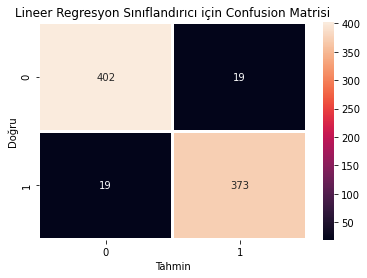

In [ ]:
y_pred_lr = lr.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(c_matrix, annot = True, fmt = "g", lw=2)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('Lineer Regresyon Sınıflandırıcı için Confusion Matrisi')
plt.show()

## test_size = 0.4

In [ ]:
model = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.4)

In [ ]:
lr = LogisticRegression(solver = "lbfgs", max_iter = 500)
lr.fit(X_train, y_train)

print(lr.score(X_test,y_test)*100)

94.76923076923077


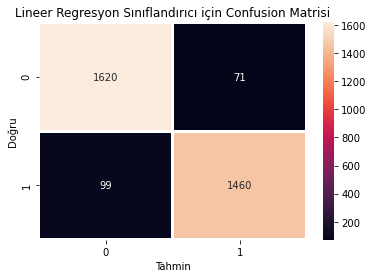

In [ ]:
c_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(c_matrix, annot = True, fmt = "g", lw=2)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('Lineer Regresyon Sınıflandırıcı için Confusion Matrisi')
plt.show()

## test_size = 0.6

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.6)

In [ ]:
lr = LogisticRegression(solver = "lbfgs", max_iter = 500)
lr.fit(X_train, y_train)
print(lr.score(X_test,y_test)*100)

94.58461538461539


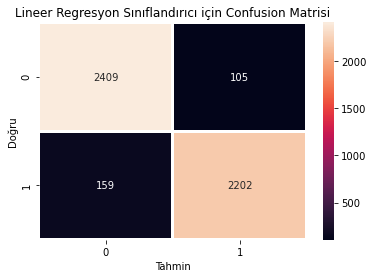

In [ ]:
y_pred_lr = lr.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(c_matrix, annot = True, fmt = "g", lw=2)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('Lineer Regresyon Sınıflandırıcı için Confusion Matrisi')
plt.show()